## readme 

Work in progress, needs better naming of the funcs

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize_scalar

## constants and functions

In [45]:
import z101_funs as f1

In [3]:
def fake_main():

In [46]:
    PATH_TO_ST = '../data_in/ciapitof_masked_filtered.csv'

    PATH_1000_CLUS = '../data_out/cluster1000.nc'

    AT = 'AIRTRACER'
    L = 'lab'

    SA = 'sa'
    MSA = 'msa'
    IA = 'ia'

    BC = 'bc_masked_ngm3'


    LBC = 'log(bc)'

    LSA = 'log10(sa)'
    LMSA = 'log10(msa)'
    LIA = 'log10(ia)'

    PAR = MSA



    COL = plt.get_cmap('Dark2')

    DC = {
        SA  : COL(0),
        MSA : COL(1),
        IA  : COL(2),
        LSA : COL(0),
        LMSA: COL(1),
        LIA : COL(2),
        BC  : COL(3),
        LBC : COL(3)
    }

In [47]:
    df = pd.read_csv(PATH_TO_ST, index_col=0, parse_dates=True)
    (df[PAR]>0).value_counts()
    df = df[df[PAR]>0][[PAR]]

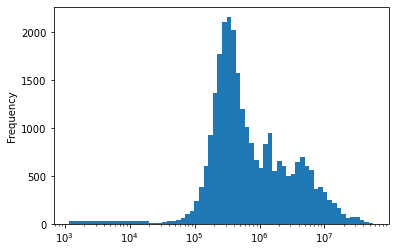

In [6]:
    f1.plot_dist_1(PAR, df)

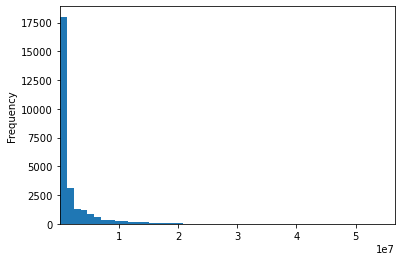

In [7]:
    f1.plot_dist_2(PAR, df)

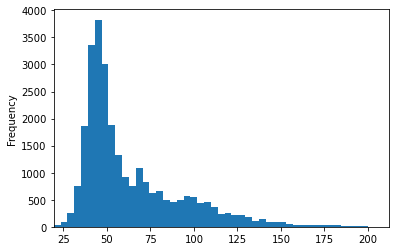

In [8]:
    f1.plot_dist_3(PAR, df)

    # # distributions
    # lets find what kind of dist. do we have. They seem to be log dists.



## open and merge flex 1000 clusters

In [49]:
    dm, ds, dsf2 = f1.open_dm(AT, L, PAR, PATH_1000_CLUS, df)

## Linear Regression

In [50]:
    lreg, y, y_pred = f1.get_simple_linear_regression(PAR, dm, dsf2)

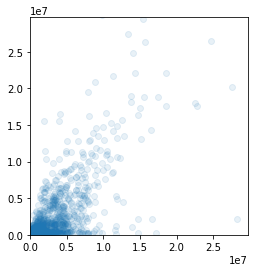

In [51]:
    f1.plot_results_simple_linear_regression(y, y_pred)

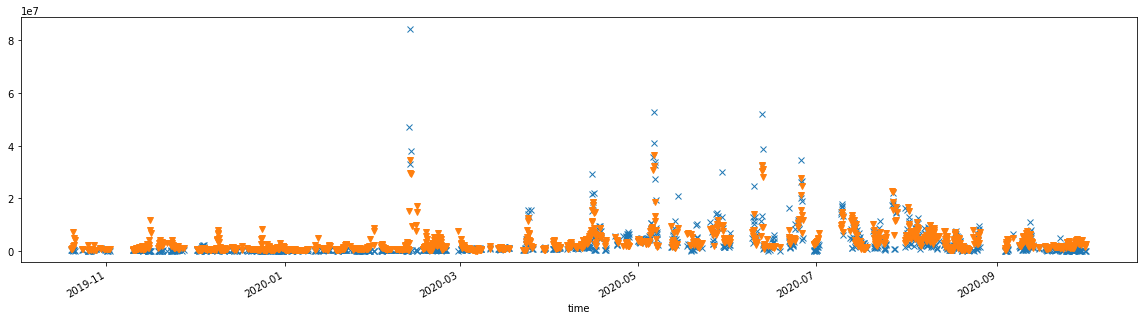

In [18]:
    f1.plot_ts_simple_linear_reg(y, y_pred)

In [19]:
    best_sd, tot_sd = f1.get_best_sd(y, y_pred)
    best_sd

0.5649802670699394

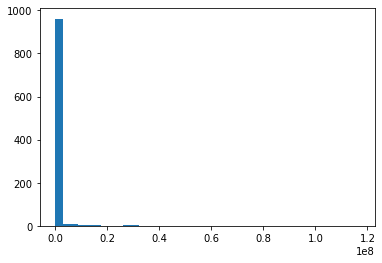

In [20]:
    plt.hist(lreg.coef_,bins=40);

   ## Elastic net regression cross validated   

   # $L_{\text {enet }}(\hat{\beta})=\frac{\sum_{i=1}^{n}\left(y_{i}-x_{i}^{\prime} \hat{\beta}\right)^{2}}{2 n}+\lambda\left(\frac{1-\alpha}{2} \sum_{j=1}^{m} \hat{\beta}_{j}^{2}+\alpha \sum_{j=1}^{m}\left|\hat{\beta}_{j}\right|\right)$

In [21]:
    e_reg_cv, y, y_pred = f1.get_e_reg_cv(PAR, dm, dsf2, y, y_pred)

In [22]:
    exp_sd = ((y-y_pred)**2).sum()**.5

In [23]:
    exp_sd/tot_sd

0.7129654974941849

In [24]:
    cv_a = e_reg_cv.alpha_
    cv_a

174.13010627593974

In [25]:
    cv_l1 = e_reg_cv.l1_ratio_
    cv_l1

0.99999

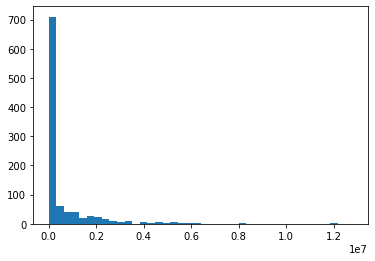

In [26]:
    plt.hist(e_reg_cv.coef_,bins=40);

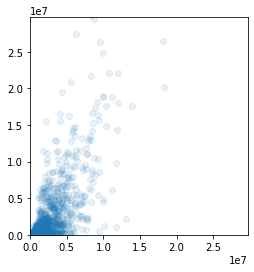

In [27]:
    f1.plot_results_simple_linear_regression(y, y_pred)

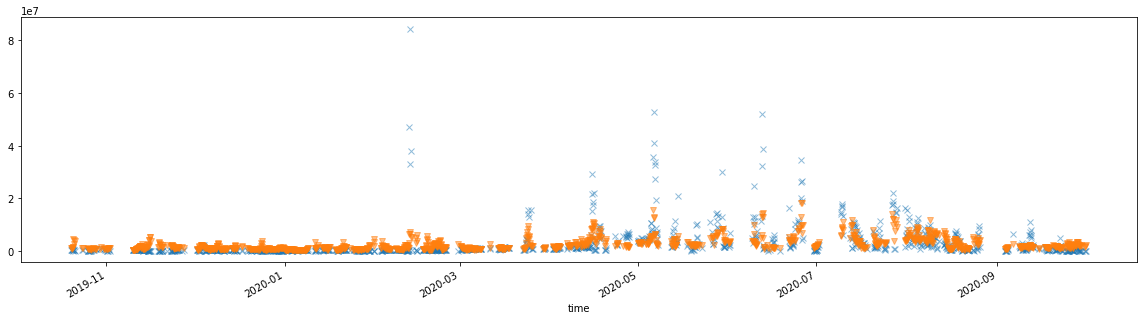

In [28]:
    f1.plot_ts_simple_linear_reg(y, y_pred)

    # alpha = a + b and l1_ratio = a / (a + b)

In [29]:
    cv_a

174.13010627593974

In [30]:
    A, B, to_min = f1.get_to_min(cv_a, cv_l1, dsf2, dm, PAR, tot_sd)

In [31]:
    res = minimize_scalar(to_min,method='Bounded',bounds=(1,300))

    dic = f1.do_something(A, B, PAR, dm, dsf2, res, tot_sd)

In [32]:
    ddf = f1.get_ddf(dic)

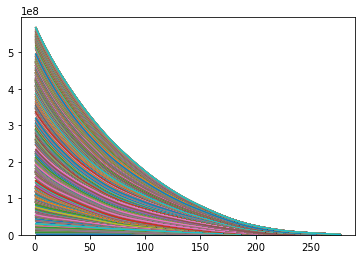

In [33]:

    f1.plot_8(ddf)

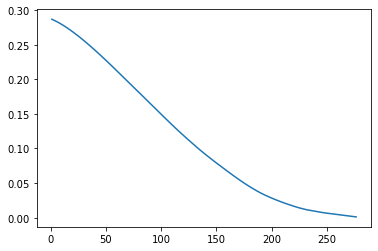

In [34]:
    f1.plot_9(dic)

In [35]:
    ddf2 = f1.get_ddf2(ddf, dic)

    la, lr, rr = f1.do_a_loop(ddf2)

In [36]:
    n_sd = pd.Series(lr)



In [37]:
    X, X1, gam1, ffit = f1.do_some_GAM(n_sd)

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: divide by zero encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values


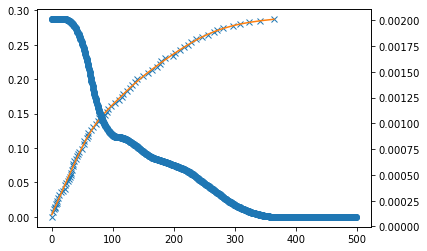

In [38]:

    f1.plot_11_13(X, X1, ffit, gam1, n_sd)
    # axx.set_yscale('log')

In [39]:
    _ds2 = f1.get_ds2(ds, ffit, la, rr)

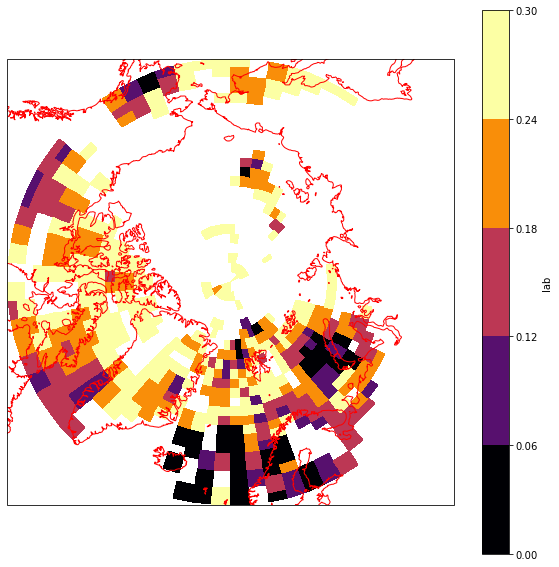

In [40]:
    f1.plot_15(_ds2)